<a href="https://colab.research.google.com/github/awesomedeba10/Cardiovascular-Risk-Prediction---AlmaBetter-Capstone-Project/blob/main/Capstone_Project_Cardiovascular_Risk_Prediction_by_Debanjan_Ganguly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Project Title : Cardiovascular Risk Prediction</u>**

## Problem Description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. 

It includes over 3,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Data Description**

Demographic:

* Sex: male or female("M" or "F")
* Age: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education: No further information provided

Behavioral:

* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## Problem Approach

### Importing Base Libraries

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

### Data exploration

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Data Science - Almabetter/Capstone Project/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
na_data = df.isnull().sum()
total_na_percentage = (na_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_na_percentage, 2)} %')

The total percentage of missing data is 15.04 %


In [ ]:
total_na = na_data.sort_values(ascending=False)
percent_total = (na_data/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total_na, percent_total], axis=1, keys=["Total", "na_percentage"])
missing_df = missing[missing['Total'] > 0]
missing_df

,Total,na_percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


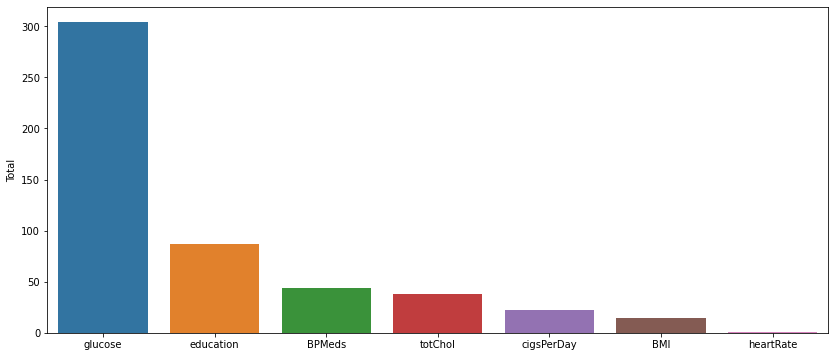

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=missing_df, y='Total', x=missing_df.index)
plt.show()

Total percentage of missing data is 15%, of which the highest is for glucose that accounts for 9% of missing data. So, we will drop all null values. Also, we will drop id column since it is an auto increment column only. 

In [ ]:
try:
    df.dropna(axis=0, inplace=True)
    df.drop(['id'], axis=1, inplace=True)
except KeyError:
    pass

In [ ]:
df['is_smoking'] = df['is_smoking'].replace({'YES': 1, 'NO': 0})
df['sex'] = df['sex'].replace({'M': 1, 'F': 0})

In [ ]:
filtered_df = df.copy()

In [ ]:
filtered_df.shape

(2927, 16)

### Exploratory Data Analysis

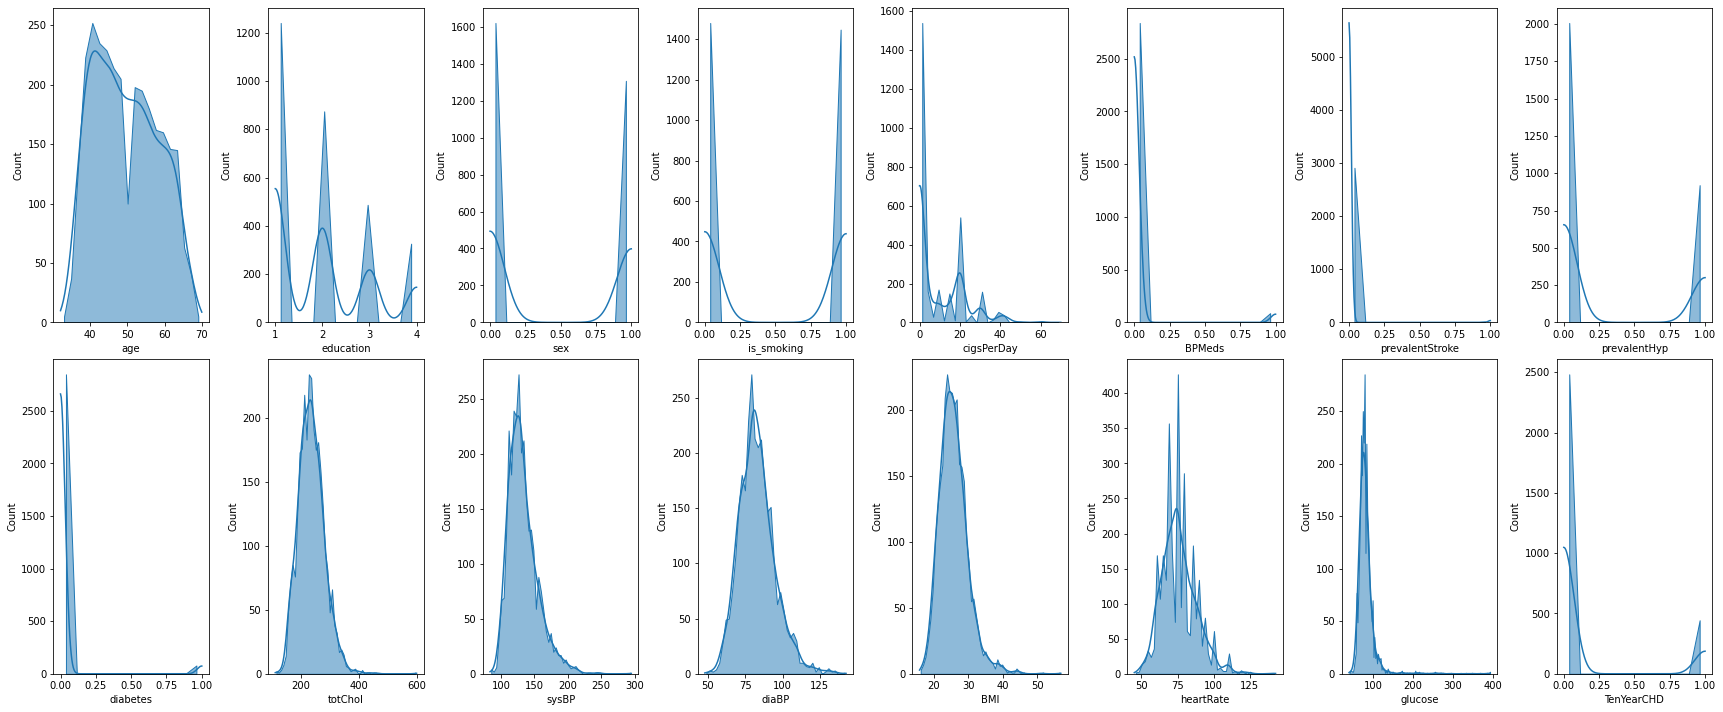

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(filtered_df.columns.tolist(), axes):
    sns.histplot(x=col, data=filtered_df, ax=ax, kde=True, element='poly', discrete=False)

plt.tight_layout(h_pad=0.5, w_pad=0.8)

From the above data distribution , we can see `BPMeds`, `prevalentStroke` and `diabetes` is very poorly balanced. Also, our target variable is also imbalanced.

In [ ]:
filtered_df['TenYearCHD_lbl'] = filtered_df['TenYearCHD'].replace({0: 'Negative', 1: 'Positive'})

Total Negative labeled count is 2483 and total positive labeled count is 444



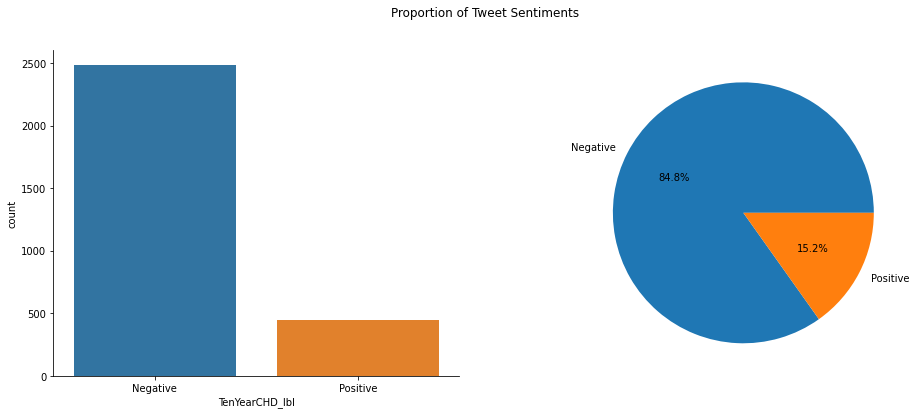

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
ax = axes.flatten()

barplt = sns.countplot(data=filtered_df, x='TenYearCHD_lbl', ax=ax[0])

labels = filtered_df['TenYearCHD_lbl'].value_counts().index
sizes = filtered_df['TenYearCHD_lbl'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%')

plt.suptitle("Proportion of Tweet Sentiments")
sns.despine()

print(f'Total Negative labeled count is {sizes[0]} and total positive labeled count is {sizes[1]}', end='\n\n')

As the distribution is really imbalaned, these could lead to class imbalance problem while fitting our model. So, we need to address this issue later on. 

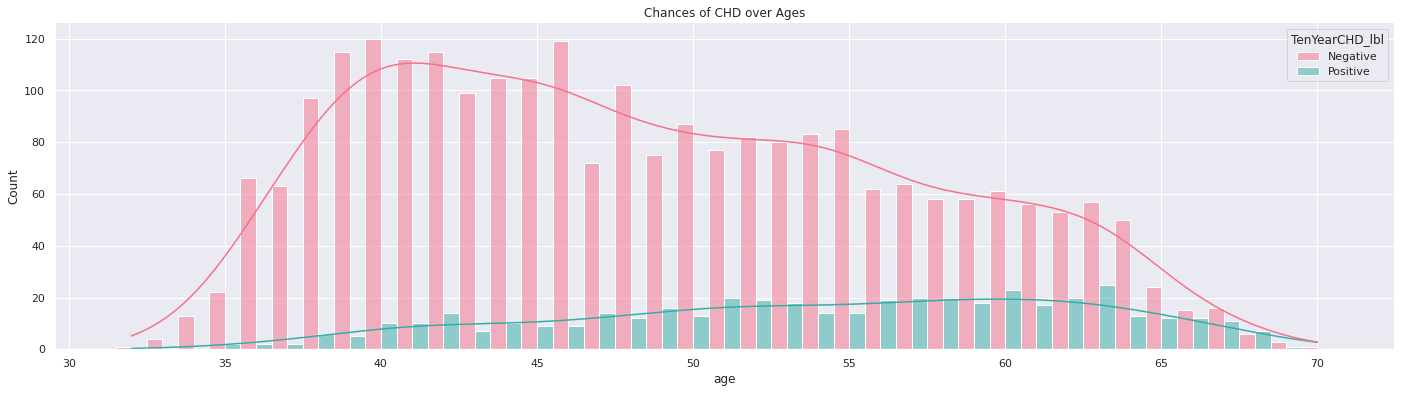

In [ ]:
plt.figure(figsize=(24, 6), facecolor='w')
sns.set_theme(style="darkgrid")
sns.histplot(data=filtered_df, hue="TenYearCHD_lbl", x='age', palette='husl', multiple="dodge", kde=True, discrete=True)
plt.title('Chances of CHD over Ages')
sns.despine()

It looks like chances are more than avg within age range of 51 to 64

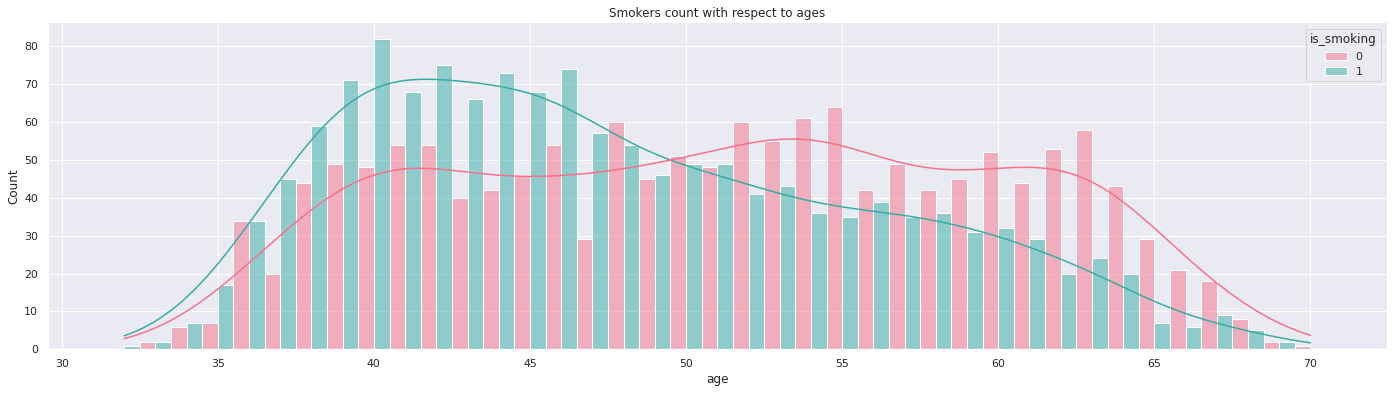

In [ ]:
plt.figure(figsize=(24, 6), facecolor='w')
sns.set_theme(style="darkgrid")
sns.histplot(data=filtered_df, hue="is_smoking", x='age', palette='husl', multiple="dodge", kde=True, discrete=True)
plt.title('Smokers count with respect to ages')
sns.despine()

Our dataset shows, mid age groups ranging from 37 to 46 has more smokers. As the age group passes 50, numbers of non-smokers gradually started increasing.

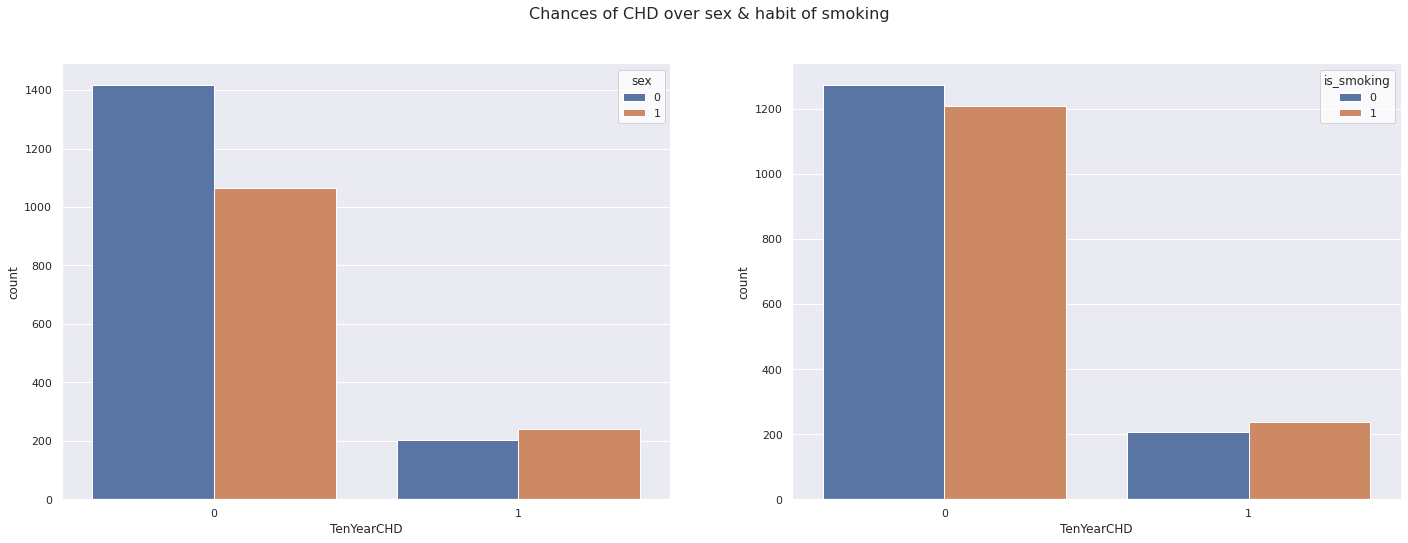

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(24, 8))
sns.set_theme(style="white")

plt.suptitle("Chances of CHD over sex & habit of smoking", size=16)
sns.countplot(data=filtered_df, x='TenYearCHD', hue='sex', ax=axes[0])
sns.countplot(data=filtered_df, x='TenYearCHD', hue='is_smoking', ax=axes[1])

sns.despine()

The above graphs shows, males has quite high risk of CHD. Also those who smokes, has similarly more risk of CHD.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

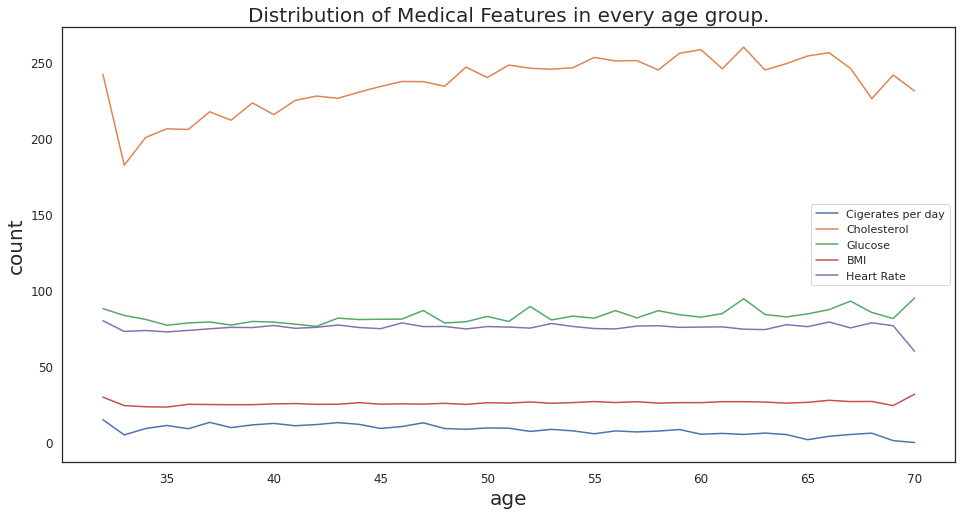

In [ ]:
cigsPerDay_df = filtered_df.groupby("age").cigsPerDay.mean()
totChol_df = filtered_df.groupby("age").totChol.mean()
glucose_df = filtered_df.groupby("age").glucose.mean()
BMI_df = filtered_df.groupby("age").BMI.mean()
heartRate_df = filtered_df.groupby("age").heartRate.mean()

plt.figure(figsize=(16,8), facecolor='w')
sns.lineplot(data=cigsPerDay_df, label="Cigerates per day")
sns.lineplot(data=totChol_df, label="Cholesterol")
sns.lineplot(data=glucose_df, label="Glucose")
sns.lineplot(data=BMI_df, label="BMI")
sns.lineplot(data=heartRate_df, label="Heart Rate")
plt.title("Distribution of Medical Features in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is some minor relation between cholesterol and glucose. Heart Rate and cigerates per day has a strong relation. Glucose has a inverse relation with heart rate in later old age. 

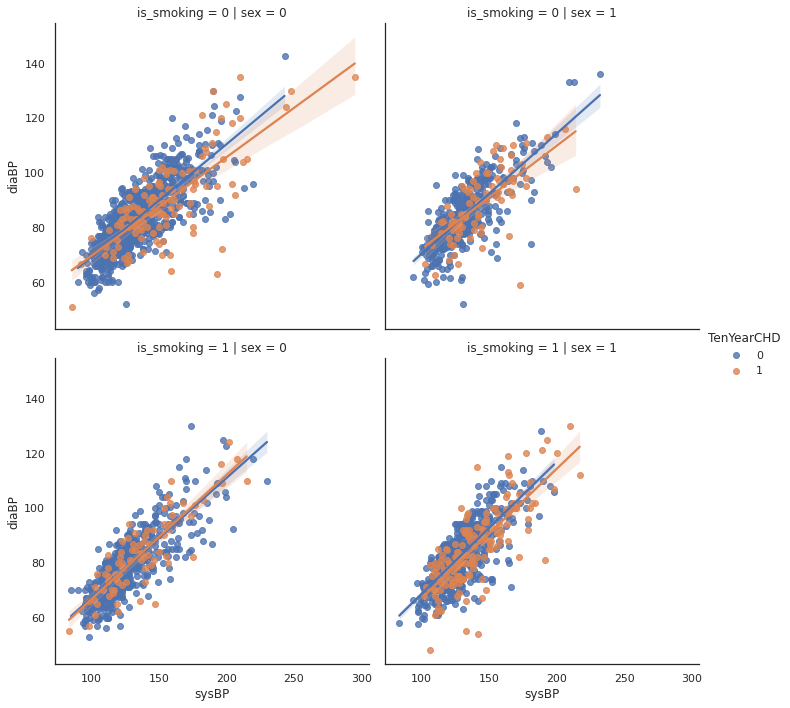

In [ ]:
sns.lmplot(x='sysBP', y='diaBP', data=filtered_df,
           hue="TenYearCHD", col="sex", row="is_smoking")

# plt.suptitle('sysBP & diaBP based on gender and smoking habits', y=0.92)
plt.show()

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

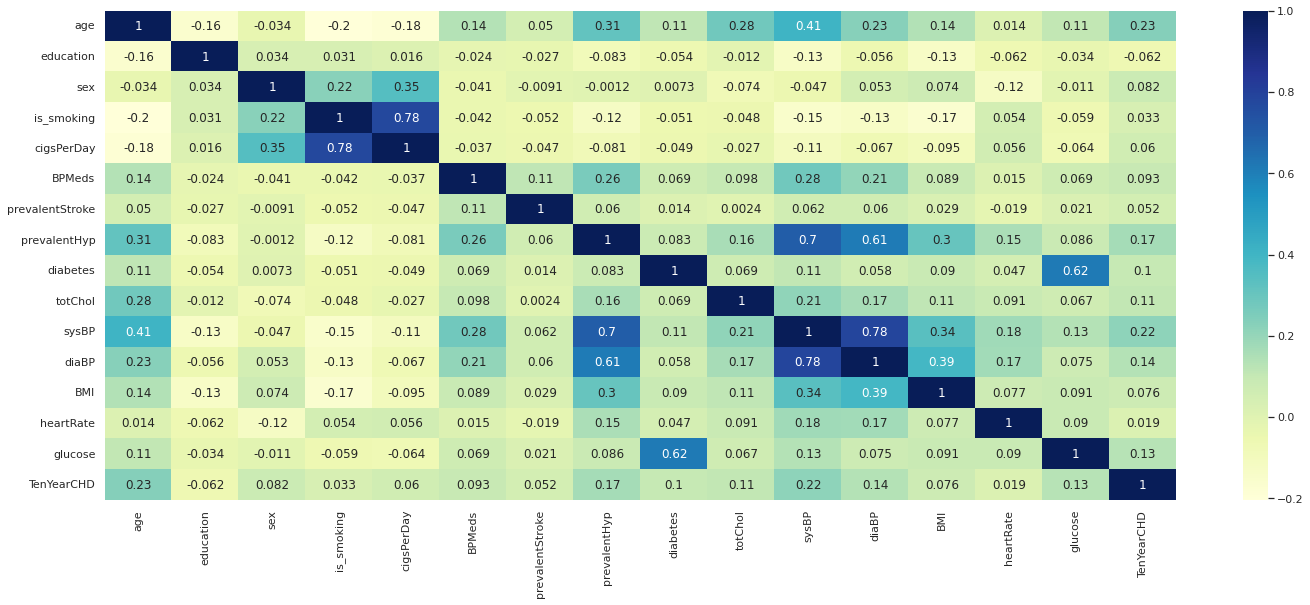

In [ ]:
plt.figure(figsize=(24,9))
sns.heatmap(filtered_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. The correlation coefficient between education and and target variable TenYearCHD is very low and actually negative. 

Also there are couple of features that are highly corelated with each other like (glucose & diabetes for obvious reason), (isSmoking & cigsPerday), (sysBP & diaBP). So we would required to select our features for our models performance.

### Feature Selection

We will select top 10 features

In [ ]:
X_check = df.iloc[:,:-1]
y_check = df['TenYearCHD']

X_check.shape, y_check.shape

((2927, 15), (2927,))

In [ ]:
!pip install boruta

     |████████████████████████████████| 56 kB 2.7 MB/s 


In [ ]:
from boruta import BorutaPy

forest_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

feat_selector = BorutaPy(forest_model, n_estimators='auto', random_state=10)
feat_selector.fit(X_check.values, y_check.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=31, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FDE7E726270),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FDE7E726270)

In [ ]:
feature_ranks = list(zip(df.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
# for feat in feature_ranks:
#     print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
pd.DataFrame(feature_ranks, columns=['features', 'ranks', 'to_be_kept']).sort_values('ranks')

,features,ranks,to_be_kept
0,age,1,True
9,totChol,1,True
10,sysBP,1,True
12,BMI,1,True
14,glucose,2,False
11,diaBP,3,False
13,heartRate,4,False
4,cigsPerDay,5,False
1,education,6,False
7,prevalentHyp,7,False


`to_be_kept == False` are the ones actually recommended to be dropped, but we're keeping max upto 5th ranked features for now, though we're taking these features after some manual trial and error on model

In [ ]:
top_features = df.columns[:-1][feat_selector.ranking_ <=5].tolist()
top_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

We're also checking best features using SelectKBest, it will select the K most explicative features out of the original set. We're doing this just to compare how relative features are given by two different algorithms.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

best = SelectKBest(score_func=chi2, k=10)
best.fit(X_check, y_check)

SelectKBest(score_func=<function chi2 at 0x7fde7df694d0>)

In [ ]:
test_scores = best.scores_
test_columns = X_check.columns.tolist()

results_df = dataset = pd.DataFrame({'columns': test_columns, 'scores': test_scores}, columns=['columns', 'scores'])
results_df.sort_values('scores', ascending=False, inplace=True)

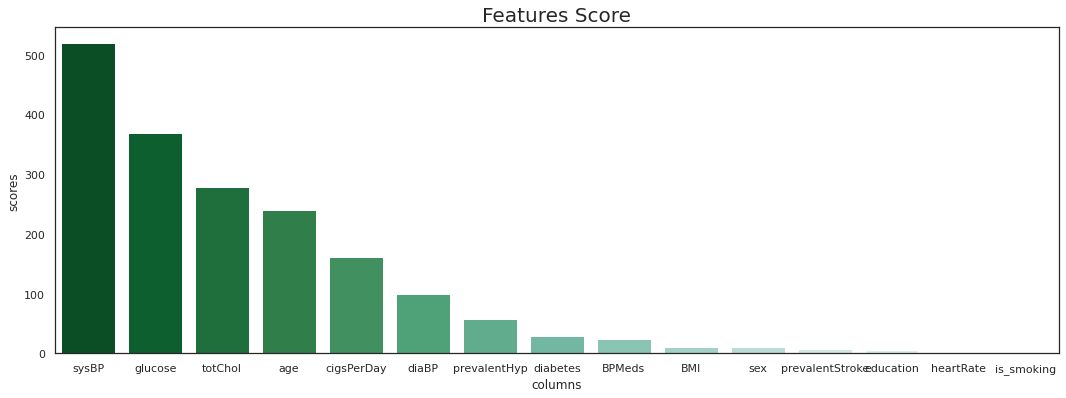

In [ ]:
plt.figure(figsize=(18,6), facecolor='w')
sns.barplot(x='columns',y='scores', data=results_df, palette='BuGn_r')
plt.title("Features Score", size=20)
plt.show()

In [ ]:
top_features_ver2 = results_df["columns"].tolist()[:8]
top_features_ver2

['sysBP',
 'glucose',
 'totChol',
 'age',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes']

Below is the features that are not common in both best feature selection methods

In [ ]:
set(top_features) - set(top_features_ver2), set(top_features_ver2) - set(top_features)

({'BMI', 'heartRate'}, {'diabetes', 'prevalentHyp'})

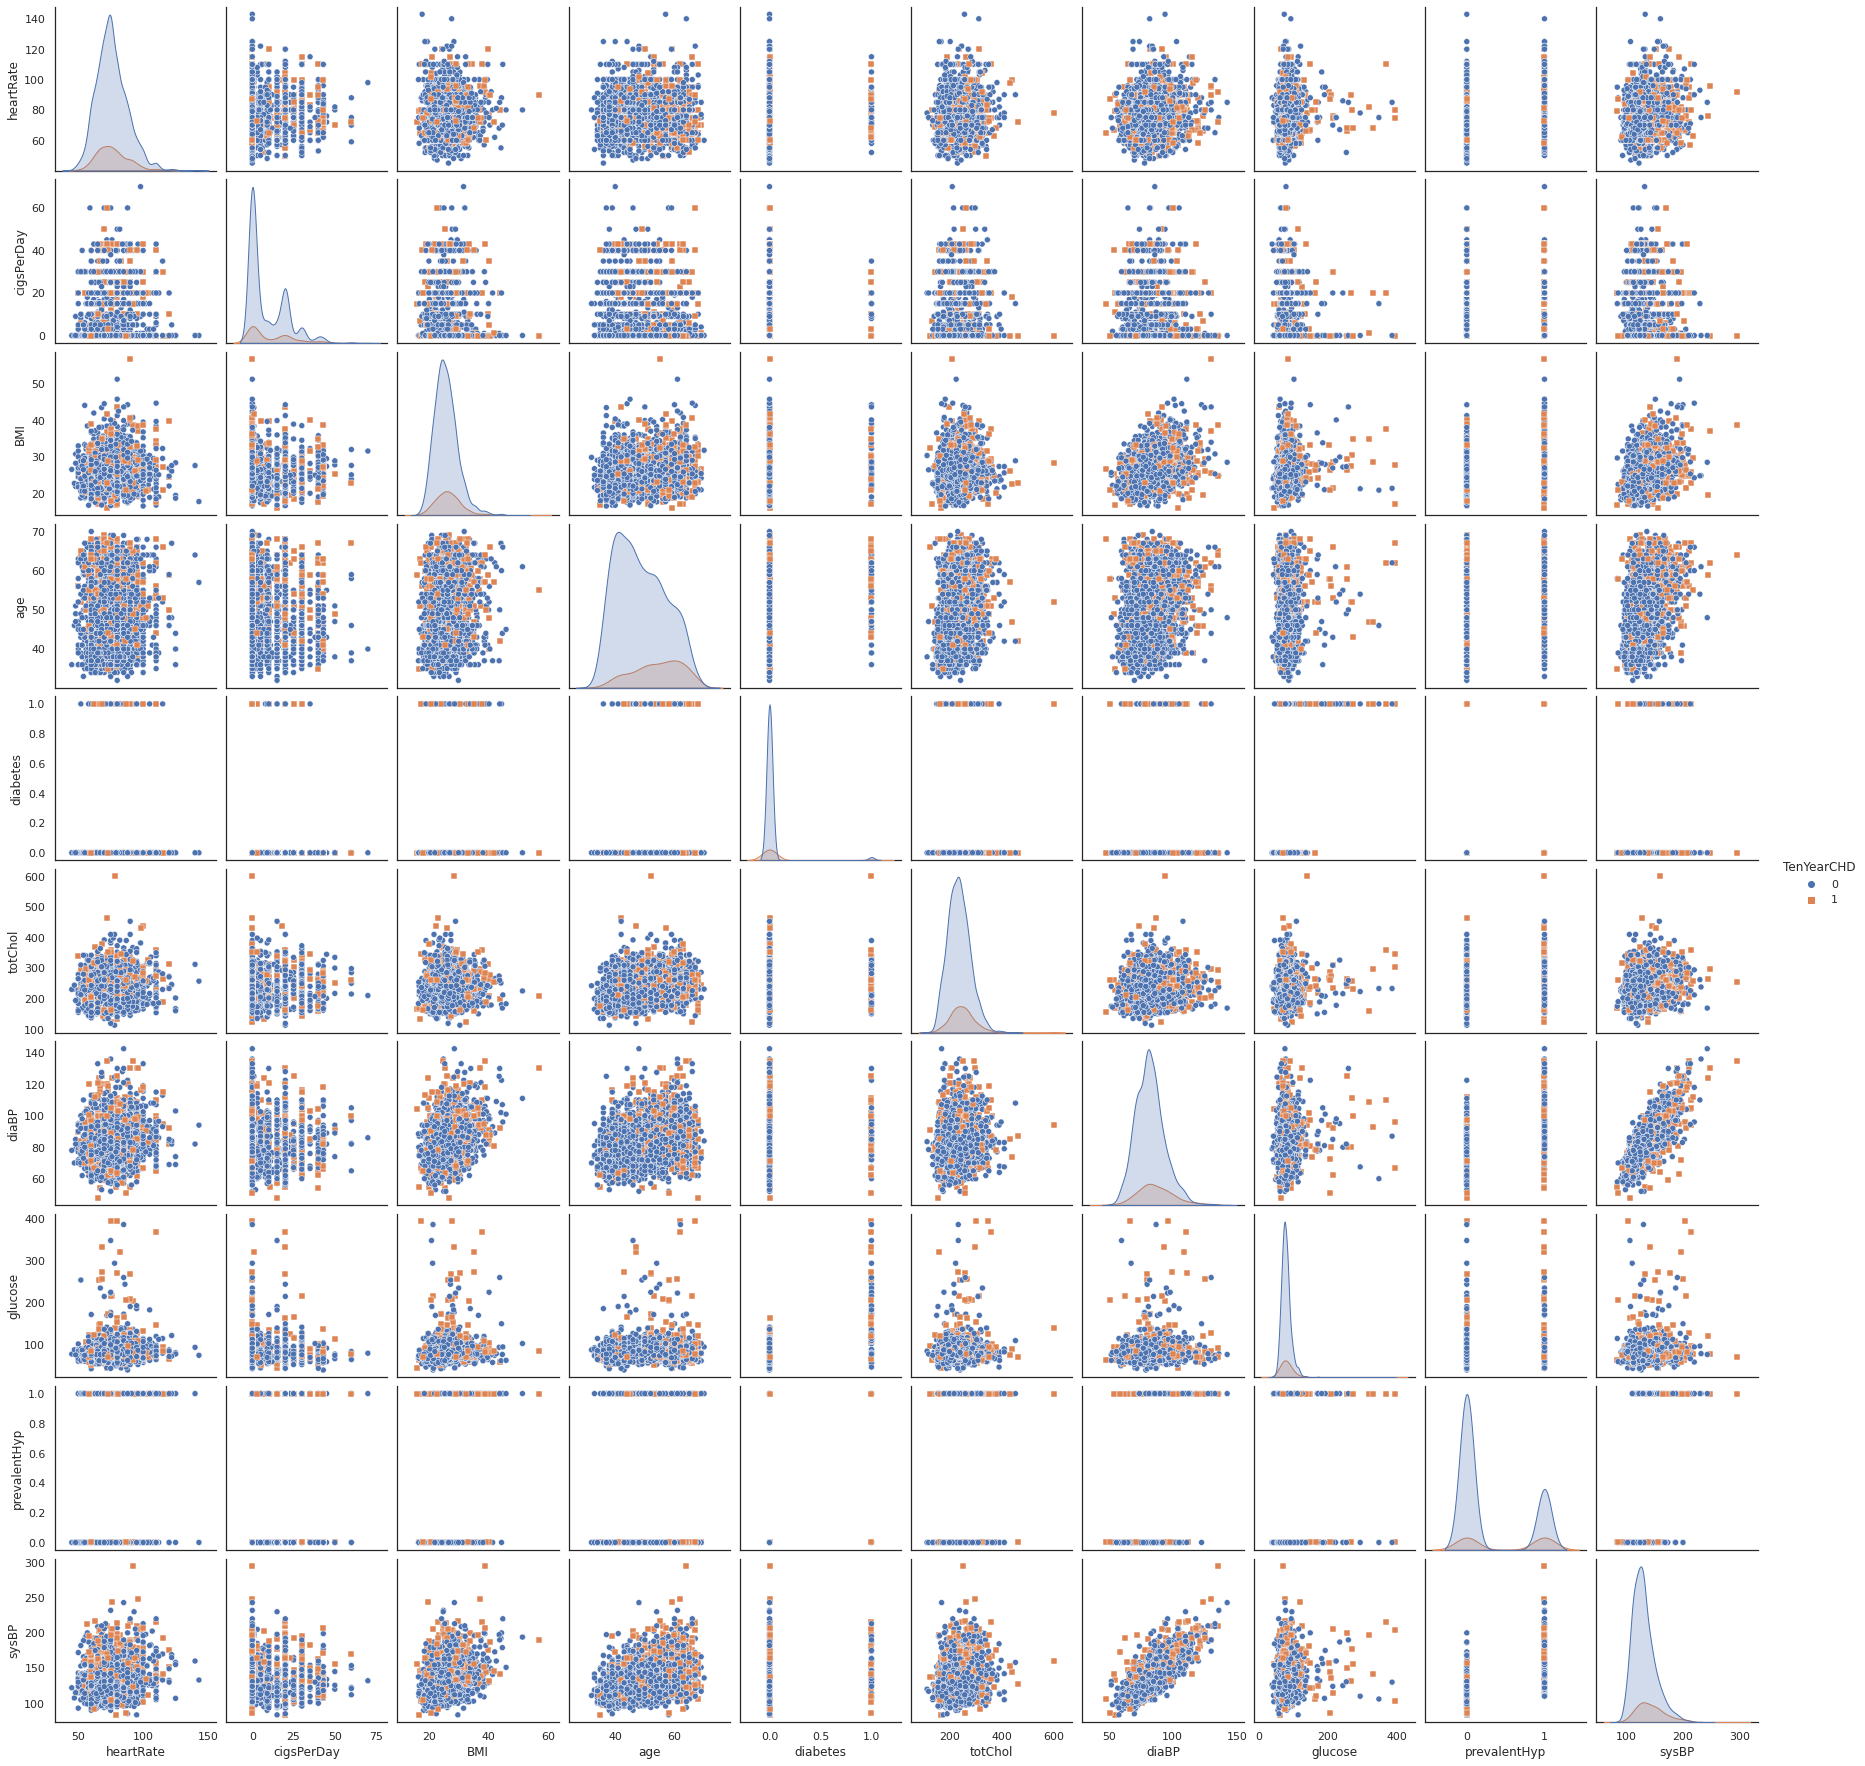

In [ ]:
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = list(set(top_features) | set(top_features_ver2)))

From the above pairplot, we found no such pattern that splits the data well

In [ ]:
common_selected_features = set(top_features).intersection(set(top_features_ver2))

In [ ]:
X = df[common_selected_features]
y = df['TenYearCHD']

### Model Preparation

we will split the data in 0.2 ratio and define a pipeline to evaluate model performance. Below is our custom function to split data within train and test set, and function to build our pipeline and evaluate models.

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=10)

#### Defining Pipeline

We will first normalize our data using standard scaler, then perform hyper parameter tuning on prediction model. To cross validate the models we've used HalvingGridSearchCV which is almost similar to grid search but performs with less times and with less resources.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
import time

def cv_model(model, cv_params, n_splits=10, verbose=0):
    t = time.time()
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

    cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=10)
    rs = HalvingGridSearchCV(pipe, cv_params, factor=3, cv=cv, verbose=verbose, n_jobs=-1, scoring='accuracy')

    rs.fit(X_train, y_train)

    print('Model Training Complete')
    print(f'Time taken {time.time() - t} seconds')
    return rs

In [ ]:
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

def resample(X, y, sampling_strategy=0.8, plot_post_sampling=True):
    num_before = dict(Counter(y))
    print(f'Number before : {num_before}')

    over = SMOTE(sampling_strategy=sampling_strategy)
    under = RandomUnderSampler(sampling_strategy=sampling_strategy)
    steps = [('o', over), ('u', under)]
    pipeline = IMBPipeline(steps=steps)

    X_smote, y_smote = pipeline.fit_resample(X, y)

    num_after =dict(Counter(y_smote))
    print(f'Number after : {num_after}')

    if plot_post_sampling:
        post_sampling_plot(num_before, num_after)

    return X_smote, y_smote

In [ ]:
def post_sampling_plot(num_before, num_after):
    fig, axes = plt.subplots(ncols=2, figsize=(14,6))
    sns.barplot(data=pd.DataFrame([num_before]), ax=axes[0])
    sns.barplot(data=pd.DataFrame([num_after]), ax=axes[1])
    axes[0].set_title("Numbers Before Balancing")
    axes[1].set_title("Numbers After Balancing")
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

def get_metrics(model, x, y):
    model_info = {}
    y_pred = model.predict(x)
    # y_pred_prob = model.predict_proba(x)
    model_info['accuracy'] = accuracy_score(y, y_pred)
    # model_info['roc_auc'] = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    model_info['precision'] = precision_score(y, y_pred, average='macro')
    model_info['recall'] = recall_score(y, y_pred, average='macro')
    model_info['f1_score'] = f1_score(y, y_pred, average='macro')
    return model_info

In [ ]:
import json

def build_metrics(model, x, y, model_name, metrics_df=None, pretty_print=True, params=None):
    metrics_dict = {
        **get_metrics(model, x, y)
    }

    try:
        metrics_dict['best_params'] = str(model.best_params_)
    except AttributeError:
        metrics_dict['best_params'] = params

    if pretty_print:
        print(json.dumps(metrics_dict, indent=4))

    if metrics_df is None:
        return pd.DataFrame(metrics_dict, index=[model_name])
    else:
        metrics_df.loc[model_name] = metrics_dict
        return metrics_df

### Model Training

#### Default Sampling

1st we will train our models on default ratio. Then we will rebalance the data and compare scores

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y)

##### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

cv_params = {
    'model__penalty': ['l2'],
    'model__C': [100, 10, 1.0, 0.1, 0.01],
    'model__class_weight': ['balanced', None]
}

log_model = cv_model(LogisticRegression(), cv_params)

Model Training Complete
Time taken 3.457818031311035 seconds


In [ ]:
model_group_metrics__default_df = build_metrics(log_model, X_test, y_test, 'LogisticRegression')

{
    "accuracy": 0.8498293515358362,
    "precision": 0.7049874831503948,
    "recall": 0.5240657427712341,
    "f1_score": 0.510052065518945,
    "best_params": "{'model__C': 100, 'model__class_weight': None, 'model__penalty': 'l2'}"
}


##### LinearSVC

In [ ]:
cv_params = {
    'model__C': np.linspace(0.1, 1, 6)
}

svc_model = cv_model(LinearSVC(max_iter=10000), cv_params)

Model Training Complete
Time taken 5.186120986938477 seconds


In [ ]:
model_group_metrics__default_df = build_metrics(svc_model, X_test, y_test, 'LinearSVC', metrics_df=model_group_metrics__default_df)

{
    "accuracy": 0.8481228668941979,
    "precision": 0.6752577319587629,
    "recall": 0.5092238826215721,
    "f1_score": 0.480263485704605,
    "best_params": "{'model__C': 1.0}"
}


##### DecisionTreeClassifier



In [ ]:
cv_params = {
    'model__splitter': ['best', 'random'],
    'model__max_depth': [100, 125, 150],
    'model__min_samples_leaf': [3, 6, 9, 12]
}

tree_model = cv_model(DecisionTreeClassifier(), cv_params)

Model Training Complete
Time taken 3.06294322013855 seconds


In [ ]:
model_group_metrics__default_df = build_metrics(tree_model, X_test, y_test, 'DecisionTreeClassifier', metrics_df=model_group_metrics__default_df)

{
    "accuracy": 0.8447098976109215,
    "precision": 0.6351626016260162,
    "recall": 0.5210476341193226,
    "f1_score": 0.5070212903643306,
    "best_params": "{'model__max_depth': 150, 'model__min_samples_leaf': 12, 'model__splitter': 'random'}"
}


##### RandomForestClassifier

In [ ]:
cv_params = {
    'model__n_estimators': [500, 750, 1000],
    'model__max_depth': [25, 50, 100]
}

rf_model = cv_model(RandomForestClassifier(n_jobs=-1), cv_params)

Model Training Complete
Time taken 163.59273624420166 seconds


In [ ]:
model_group_metrics__default_df = build_metrics(rf_model, X_test, y_test, 
            model_name='RandomForestClassifier', metrics_df=model_group_metrics__default_df)

{
    "accuracy": 0.8532423208191127,
    "precision": 0.7246976119094386,
    "recall": 0.5491375217597722,
    "f1_score": 0.554001911572091,
    "best_params": "{'model__max_depth': 25, 'model__n_estimators': 500}"
}


##### KNeighborsClassifier

In [ ]:
cv_params = {
    'model__n_neighbors': np.arange(1, 10)
}

knn_model = cv_model(KNeighborsClassifier(), cv_params)

Model Training Complete
Time taken 3.3347280025482178 seconds


In [ ]:
model_group_metrics__default_df = build_metrics(knn_model, X_test, y_test, 
            model_name='KNeighborsClassifier', metrics_df=model_group_metrics__default_df)

{
    "accuracy": 0.8327645051194539,
    "precision": 0.5010068465565848,
    "recall": 0.5001695566658377,
    "f1_score": 0.47381345061389046,
    "best_params": "{'model__n_neighbors': 6}"
}


##### BernoulliNB

In [ ]:
cv_params = {
    'model__alpha': np.linspace(0.01, 0.1, 10),
    'model__fit_prior': [True, False],
}

nb_model = cv_model(BernoulliNB(), cv_params)

Model Training Complete
Time taken 2.7119810581207275 seconds


In [ ]:
model_group_metrics__default_df = build_metrics(nb_model, X_test, y_test, 
            model_name='BernoulliNB', metrics_df=model_group_metrics__default_df)

{
    "accuracy": 0.8481228668941979,
    "precision": 0.6758620689655173,
    "recall": 0.5138358239323582,
    "f1_score": 0.49026047011679613,
    "best_params": "{'model__alpha': 0.09000000000000001, 'model__fit_prior': True}"
}


In [ ]:
# set up group of evaluation metrics
model_group_metrics__default_df['group'] = 'Default Sampled'

#### Oversampling 

Since the dataset is imbalanced we may end up predicting only negative classes, so we need to balance the dataset. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE) and RandomOverSampler

Number before : {0: 2483, 1: 444}
Number after : {0: 2482, 1: 1986}


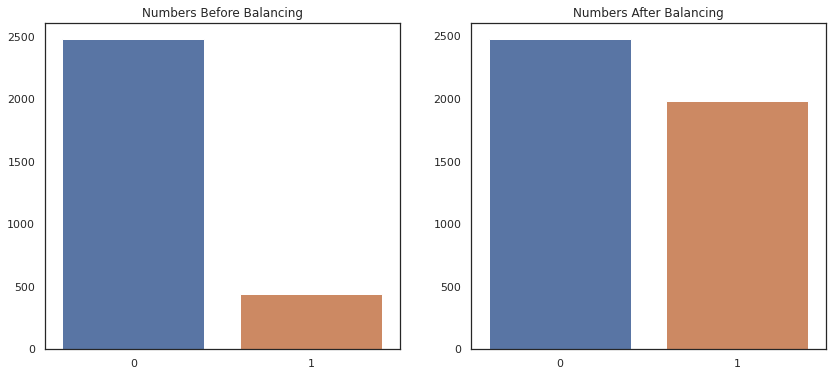

In [ ]:
X_smote, y_smote = resample(X, y)

X_train, X_test, y_train, y_test = split_data(X_smote, y_smote)

##### LogisticRegression

In [ ]:
cv_params = {
    'model__penalty': ['l2'],
    'model__C': [100, 10, 1.0, 0.1, 0.01],
    'model__class_weight': ['balanced', None]
}

log_model = cv_model(LogisticRegression(), cv_params)

Model Training Complete
Time taken 2.0163464546203613 seconds


In [ ]:
model_group_metrics__smote_df = build_metrics(log_model, X_test, y_test, 'LogisticRegression')

{
    "accuracy": 0.6868008948545862,
    "precision": 0.6858106755295719,
    "recall": 0.692095131644312,
    "f1_score": 0.6838755304101839,
    "best_params": "{'model__C': 1.0, 'model__class_weight': 'balanced', 'model__penalty': 'l2'}"
}


##### LinearSVC

In [ ]:
cv_params = {
    'model__C': np.linspace(0.1, 1, 6),
}

svc_model = cv_model(LinearSVC(max_iter=10000), cv_params)

Model Training Complete
Time taken 8.632387399673462 seconds


In [ ]:
model_group_metrics__smote_df = build_metrics(svc_model, X_test, y_test, 'LinearSVC', metrics_df=model_group_metrics__smote_df)

{
    "accuracy": 0.6812080536912751,
    "precision": 0.6708922313760401,
    "recall": 0.6718517138599106,
    "f1_score": 0.6713281932273923,
    "best_params": "{'model__C': 0.82}"
}


##### DecissionTreeClassiffier

In [ ]:
cv_params = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [100, 125, 150],
    'model__min_samples_leaf': [3, 6, 9, 12]
}

tree_model = cv_model(DecisionTreeClassifier(), cv_params)

Model Training Complete
Time taken 6.110774040222168 seconds


In [ ]:
model_group_metrics__smote_df = build_metrics(tree_model, X_test, y_test, 
        'DecisionTreeClassifier', metrics_df=model_group_metrics__smote_df)

{
    "accuracy": 0.738255033557047,
    "precision": 0.729307116104869,
    "recall": 0.7281110283159463,
    "f1_score": 0.7286734836811879,
    "best_params": "{'model__criterion': 'gini', 'model__max_depth': 150, 'model__min_samples_leaf': 6, 'model__splitter': 'best'}"
}


##### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cv_params = {
    'model__n_estimators': [500, 750, 1000],
    'model__max_depth': [25, 50, 100]
}

rf_model = cv_model(RandomForestClassifier(), cv_params)

Model Training Complete
Time taken 202.26622009277344 seconds


In [ ]:
model_group_metrics__smote_df = build_metrics(rf_model, X_test, y_test, 
        'RandomForestClassifier', metrics_df=model_group_metrics__smote_df)

{
    "accuracy": 0.8534675615212528,
    "precision": 0.8476830757846829,
    "recall": 0.8549894436164928,
    "f1_score": 0.8502522136623725,
    "best_params": "{'model__max_depth': 100, 'model__n_estimators': 1000}"
}


##### KNeighborsClassifier

In [ ]:
cv_params = {
    'model__n_neighbors': np.arange(1, 10)
}

knn_model = cv_model(KNeighborsClassifier(), cv_params)

Model Training Complete
Time taken 4.101441383361816 seconds


In [ ]:
model_group_metrics__smote_df = build_metrics(knn_model, X_test, y_test,
        'KNeighborsClassifier', metrics_df=model_group_metrics__smote_df)

{
    "accuracy": 0.8366890380313199,
    "precision": 0.841699771277236,
    "recall": 0.8525211127670145,
    "f1_score": 0.8359501078382577,
    "best_params": "{'model__n_neighbors': 1}"
}


##### BernoulliNB

In [ ]:
cv_params = {
    'model__alpha': np.linspace(0.01, 0.1, 10),
    'model__fit_prior': [True, False],
}

nb_model = cv_model(BernoulliNB(), cv_params)

Model Training Complete
Time taken 2.7758209705352783 seconds


In [ ]:
model_group_metrics__smote_df = build_metrics(nb_model, X_test, y_test, 
        'BernoulliNB', metrics_df=model_group_metrics__smote_df)

{
    "accuracy": 0.6778523489932886,
    "precision": 0.6676918179577753,
    "recall": 0.6690108047690015,
    "f1_score": 0.66826261512217,
    "best_params": "{'model__alpha': 0.09000000000000001, 'model__fit_prior': True}"
}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(X_train, y_train)
gvc_predicted = gvc.predict(X_test)
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test,gvc_predicted))

confussion matrix
[[414 114]
 [ 98 268]]


Accuracy of Gradient Boosting Classifier: 76.28635346756153 

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       528
           1       0.70      0.73      0.72       366

    accuracy                           0.76       894
   macro avg       0.76      0.76      0.76       894
weighted avg       0.76      0.76      0.76       894



In [ ]:
model_group_metrics__smote_df['group'] = 'Oversampled with SMOTE'

#### Model Evaluation


In [ ]:
def plot_coefficients(
    pipe        : Pipeline,
    vec_name    : str,
    model_name  : str,
    label       : int,
    title       : str,
    top_n       : int = 10
) -> None:
    """
    pipe : pipeline object
    vec_name : text vectorizer (CountVec, TfIdfVec) name in pipeline step
    model_name : name of model in pipeline step
    label : integer label like, 0 for negative, 2 for positive
    title : plot title
    top_n : no of features for each classes
    Reference : https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
    """
    
    features = np.array(pipe.named_steps[vec_name].get_feature_names_out())
    coef     = pipe.named_steps[model_name].coef_[label]
    
    top_positive_coefficients = np.argsort(coef)[-top_n:]
    top_negative_coefficients = np.argsort(coef)[:top_n]
    
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    colors = ["Positive" if c > 0 else "Negative" for c in coef[top_coefficients]]
    
    df = pd.DataFrame({"Word": features[top_coefficients],
                       "Similarity Probablity Score": coef[top_coefficients],
                       "Influence"  : colors})
    
    fig = px.bar(df, y = "Similarity Probablity Score", x ="Word", 
                 title=title,
                 color="Influence",
                 category_orders={'Influence':['Negative','Positive']},
                 color_discrete_sequence=['red','blue']
            )

    fig.update_layout(legend_traceorder="reversed")
    fig.show()

In [ ]:
def plot_comparison(
    metrics_df  : pd.DataFrame,
    x           : str,
    y           : str,
    hue         : str = None,
    title       : str = 'Comparison of Model Metrics',
    figsize     : tuple = (20, 10)
) -> None:
    """
    Plot the comparison barplot between different models evaluation metrics
    """
    plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, data=metrics_df, hue=hue, palette='hot')
    plt.title(title)
    plt.show()

In [ ]:
from numpy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_roc_pr(
    y_pred   : np.ndarray,
    y_test    : np.ndarray,
    pos_label = 'Positive'
) -> None:
    """
    Plots the ROC + Precision recall curves for 
    Credit: https://github.com/mdh266/TextClassificationApp/blob/master/notebooks/utils/Plot_ROC_PR_Curve.py
    """
    n_classes = y_test.shape[1]
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # Plot all ROC curves

    # First aggregate all false positive rates
    lw      =2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))


    ax1.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='gold', linestyle=':', linewidth=4)

    ax1.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    for i, color in zip(range(n_classes), colors):
        ax1.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    ax1.plot([0, 1], [0, 1], 'k--', lw=lw)
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Extension of Receiver operating characteristic to multi-class')
    ax1.legend(loc="lower left")
    # ax1.show()


    # setup plot details

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                            y_pred[:, i])

        average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
                                                                    y_pred.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                         average="micro")

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    # plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)


    l, = ax2.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))


    for i, color in zip(range(n_classes), colors):
        l, = ax2.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    # fig = plt.gcf()
    # fig.subplots_adjust(bottom=0.25)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Extension of Precision-Recall curve to multi-class')
    ax2.legend(lines, labels) #, loc=(0, -.38), prop=dict(size=14))

##### Metrics Comparison

In [ ]:
print("Classification Metrics of Default Dataset")

model_group_metrics__default_df

Classification Metrics of Default Dataset


,accuracy,precision,recall,f1_score,best_params,group
LogisticRegression,0.849829,0.704987,0.524066,0.510052,"{'model__C': 100, 'model__class_weight': None,...",Default Sampled
LinearSVC,0.848123,0.675258,0.509224,0.480263,{'model__C': 1.0},Default Sampled
DecisionTreeClassifier,0.844710,0.635163,0.521048,0.507021,"{'model__max_depth': 150, 'model__min_samples_...",Default Sampled
RandomForestClassifier,0.853242,0.724698,0.549138,0.554002,"{'model__max_depth': 25, 'model__n_estimators'...",Default Sampled
KNeighborsClassifier,0.832765,0.501007,0.500170,0.473813,{'model__n_neighbors': 6},Default Sampled
BernoulliNB,0.848123,0.675862,0.513836,0.490260,"{'model__alpha': 0.09000000000000001, 'model__...",Default Sampled


In [ ]:
print("Classification Metrics of Oversampled Dataset using SMOTE")

model_group_metrics__smote_df

Classification Metrics of Oversampled Dataset using SMOTE


,accuracy,precision,recall,f1_score,best_params,group
LogisticRegression,0.686801,0.685811,0.692095,0.683876,"{'model__C': 1.0, 'model__class_weight': 'bala...",Oversampled with SMOTE
LinearSVC,0.681208,0.670892,0.671852,0.671328,{'model__C': 0.82},Oversampled with SMOTE
DecisionTreeClassifier,0.738255,0.729307,0.728111,0.728673,"{'model__criterion': 'gini', 'model__max_depth...",Oversampled with SMOTE
RandomForestClassifier,0.853468,0.847683,0.854989,0.850252,"{'model__max_depth': 100, 'model__n_estimators...",Oversampled with SMOTE
KNeighborsClassifier,0.836689,0.841700,0.852521,0.835950,{'model__n_neighbors': 1},Oversampled with SMOTE
BernoulliNB,0.677852,0.667692,0.669011,0.668263,"{'model__alpha': 0.09000000000000001, 'model__...",Oversampled with SMOTE


In [ ]:
def combine_df(df_list: list) -> pd.DataFrame:
    return pd.concat(df_list)

model_metrics_df = combine_df([model_group_metrics__default_df, model_group_metrics__smote_df])

In [ ]:
model_metrics_df['model'] = model_metrics_df.index
model_metrics_df.iloc[:, :-1].sort_values('f1_score', ascending=False)

,accuracy,precision,recall,f1_score,best_params,group
RandomForestClassifier,0.853468,0.847683,0.854989,0.850252,"{'model__max_depth': 100, 'model__n_estimators...",Oversampled with SMOTE
KNeighborsClassifier,0.836689,0.841700,0.852521,0.835950,{'model__n_neighbors': 1},Oversampled with SMOTE
DecisionTreeClassifier,0.738255,0.729307,0.728111,0.728673,"{'model__criterion': 'gini', 'model__max_depth...",Oversampled with SMOTE
LogisticRegression,0.686801,0.685811,0.692095,0.683876,"{'model__C': 1.0, 'model__class_weight': 'bala...",Oversampled with SMOTE
LinearSVC,0.681208,0.670892,0.671852,0.671328,{'model__C': 0.82},Oversampled with SMOTE
BernoulliNB,0.677852,0.667692,0.669011,0.668263,"{'model__alpha': 0.09000000000000001, 'model__...",Oversampled with SMOTE
RandomForestClassifier,0.853242,0.724698,0.549138,0.554002,"{'model__max_depth': 25, 'model__n_estimators'...",Default Sampled
LogisticRegression,0.849829,0.704987,0.524066,0.510052,"{'model__C': 100, 'model__class_weight': None,...",Default Sampled
DecisionTreeClassifier,0.844710,0.635163,0.521048,0.507021,"{'model__max_depth': 150, 'model__min_samples_...",Default Sampled
BernoulliNB,0.848123,0.675862,0.513836,0.490260,"{'model__alpha': 0.09000000000000001, 'model__...",Default Sampled


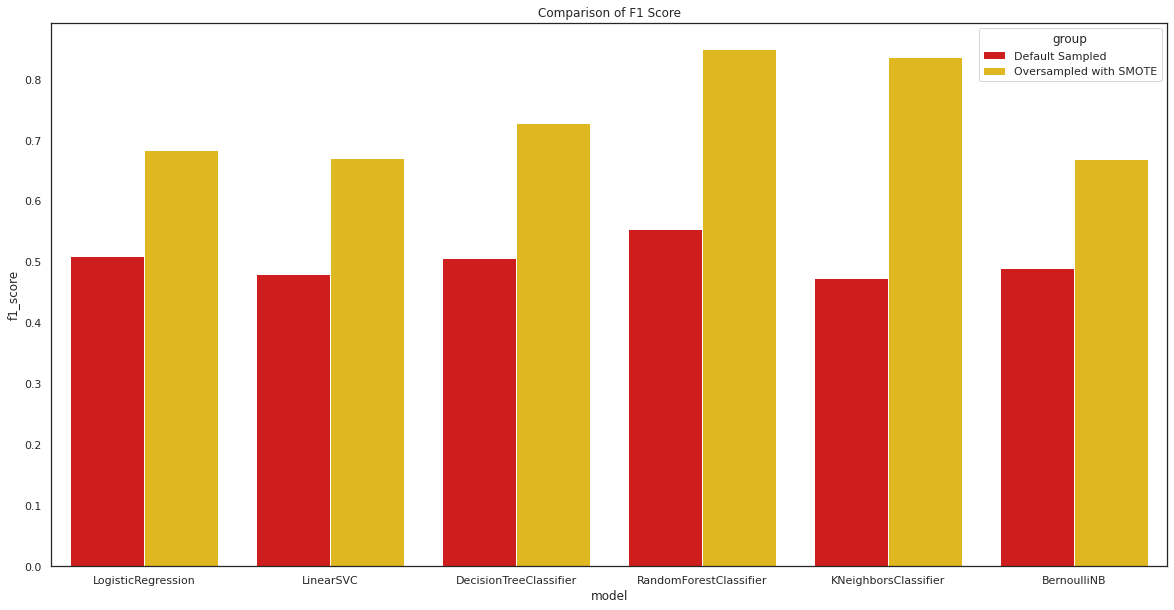

In [ ]:
plot_comparison(model_metrics_df, x='model', y='f1_score', hue='group',
            title='Comparison of F1 Score')

For every model, oversampled dataset performed much better than the imbalanced one. Random forest achieved highest metrics in every category, also achived highest performance increase followed by k-nearest neighbour. We will use random forest for our final model

### Final Model

In [ ]:
X_smote, y_smote = resample(X, y, plot_post_sampling=False)

X_train, X_test, y_train, y_test = split_data(X_smote, y_smote)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=100, n_estimators=500, n_jobs=-1, oob_score=True)
_ = rf.fit(X_scaled_train, y_train)

Number before : {0: 2483, 1: 444}
Number after : {0: 2482, 1: 1986}


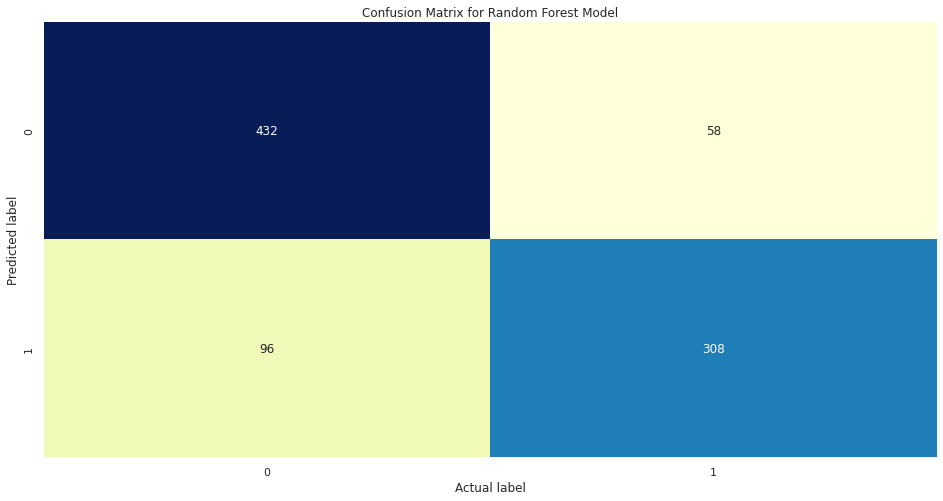

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_scaled_test)

plt.figure(figsize=(16, 8))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cmap="YlGnBu", cbar=False)

plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
# plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score, classification_report

print(classification_report(y_test, y_pred))

print("Balanced Accuracy Score is : {}".format(balanced_accuracy_score(y_test, y_pred)))
print("Average Weighted F1 Score is : {}".format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       528
           1       0.76      0.84      0.80       366

    accuracy                           0.83       894
   macro avg       0.82      0.83      0.82       894
weighted avg       0.83      0.83      0.83       894

Balanced Accuracy Score is : 0.8298559364133136
Average Weighted F1 Score is : 0.8287759918777442


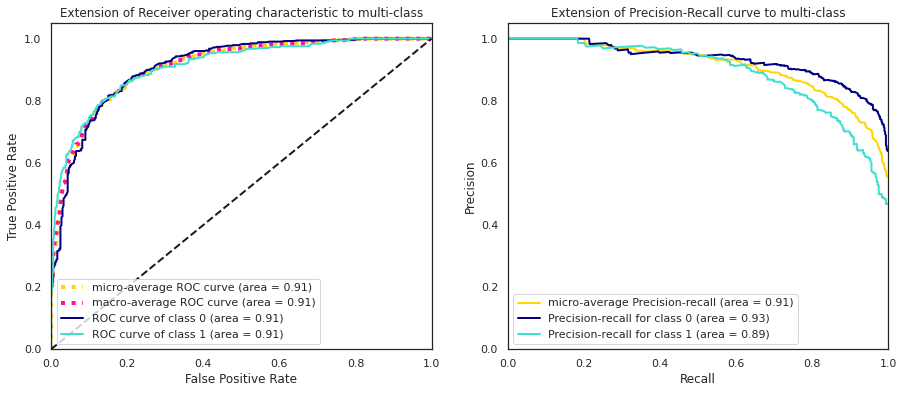

In [ ]:
from sklearn.preprocessing import label_binarize

y_pred_proba = rf.predict_proba(X_scaled_test)
classes   = np.sort(y_test.unique())
y_test_lb = label_binarize(y_test, 
                        classes=classes)

# for 2 class, label binarizer returning vector
# so we've used hstack to create shape
y_test_lb = np.hstack((1 - y_test_lb, y_test_lb))

plot_roc_pr(y_pred_proba, y_test_lb)

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


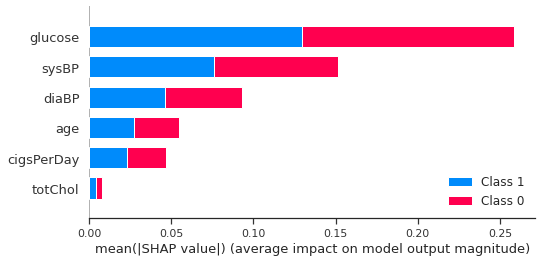

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

The feature importances for respective classes in descending order. Glucose & sysBP contribute more to the model thus have a high predictive power.

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.1 MB/s 


##### Prediction

We will predict a random observation using our trained model

In [ ]:
from eli5 import show_prediction

def explain_pred(features, feature_names, model=rf):
    return show_prediction(model, features, feature_names=feature_names,
                show_feature_values=True)

In [ ]:
def predict_risk(features, actual, feature_names, model=rf, explain=True):
    print(f'Actual observation is {actual}')
    pred = model.predict(features.reshape(1, -1))
    pred_proba = model.predict_proba(features.reshape(1, -1))
    if (pred[0] == 1):
        probablity = pred_proba[0][1]
    else:
        probablity = pred_proba[0][0]
    print(f'Predicted observation is {pred[0]} with a probablity of {probablity}')

    if explain:
        return explain_pred(features, feature_names)

In [ ]:
predict_risk(np.array(X_scaled_test)[3], np.array(y_test)[3], list(X_test.columns))

Actual observation is 1
Predicted observation is 1 with a probablity of 0.576


In [ ]:
predict_risk(np.array(X_scaled_test)[56], np.array(y_test)[56], list(X_test.columns))

Actual observation is 0
Predicted observation is 0 with a probablity of 0.82


### Conclusion

*   The most important features in prediction is glucose and sysBp
*   The random forest is proved to be best algorithms among our tested ones
*   Balancing the dataset using SMOTE helped tremendously in improving the model performance
*   With more observation, features value with strong pridiction ability a better model can be built



### Reference


*   https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a

